In [1]:
from google.colab import files
uploaded = files.upload()

Saving cats_vs_dogs_dataset.zip to cats_vs_dogs_dataset (1).zip


In [2]:
import zipfile
import os

with zipfile.ZipFile('cats_vs_dogs_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')

base_dir = '/content/data'

In [9]:
!wget https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip

--2026-02-21 12:38:51--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 72.247.96.197, 2600:1406:5400:2ac::317f, 2600:1406:5400:2ae::317f
Connecting to download.microsoft.com (download.microsoft.com)|72.247.96.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   259MB/s    in 3.0s    

2026-02-21 12:38:54 (259 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [10]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [101]:
input_path =[]
label=[]
for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name=='cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages",class_name,path))
print(input_path[0],label[0])



PetImages/Cat/8548.jpg 1


In [102]:
df=pd.DataFrame()
df['images']=input_path
df['label']=label
df=df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Cat/2546.jpg      1
1   PetImages/Dog/4245.jpg      1
2   PetImages/Cat/1217.jpg      1
3   PetImages/Dog/9088.jpg      1
4  PetImages/Dog/11703.jpg      1

In [103]:
for i in df['images']:
  if '.jpg' not in i:
    print(i)


PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [104]:
import PIL;
l=[]
for image in df['images']:
  try:
    img=PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db']

In [105]:
df=df[df['images']!='PetImages/Dog/Thumbs.db']
df=df[df['images']!='PetImages/Cat/Thumbs.db']
df=df[df['images']!='PetImages/Cat/666.jpg']
df=df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

In [107]:
df['label'] = df['images'].apply(lambda x: 0 if "Cat" in x else 1)
df['label'] = df['label'].astype(str)

In [110]:
test.head()

images label
9254    PetImages/Cat/9043.jpg     0
8049   PetImages/Cat/10955.jpg     0
23757   PetImages/Dog/1907.jpg     1
3463     PetImages/Cat/982.jpg     0
20539   PetImages/Dog/5146.jpg     1

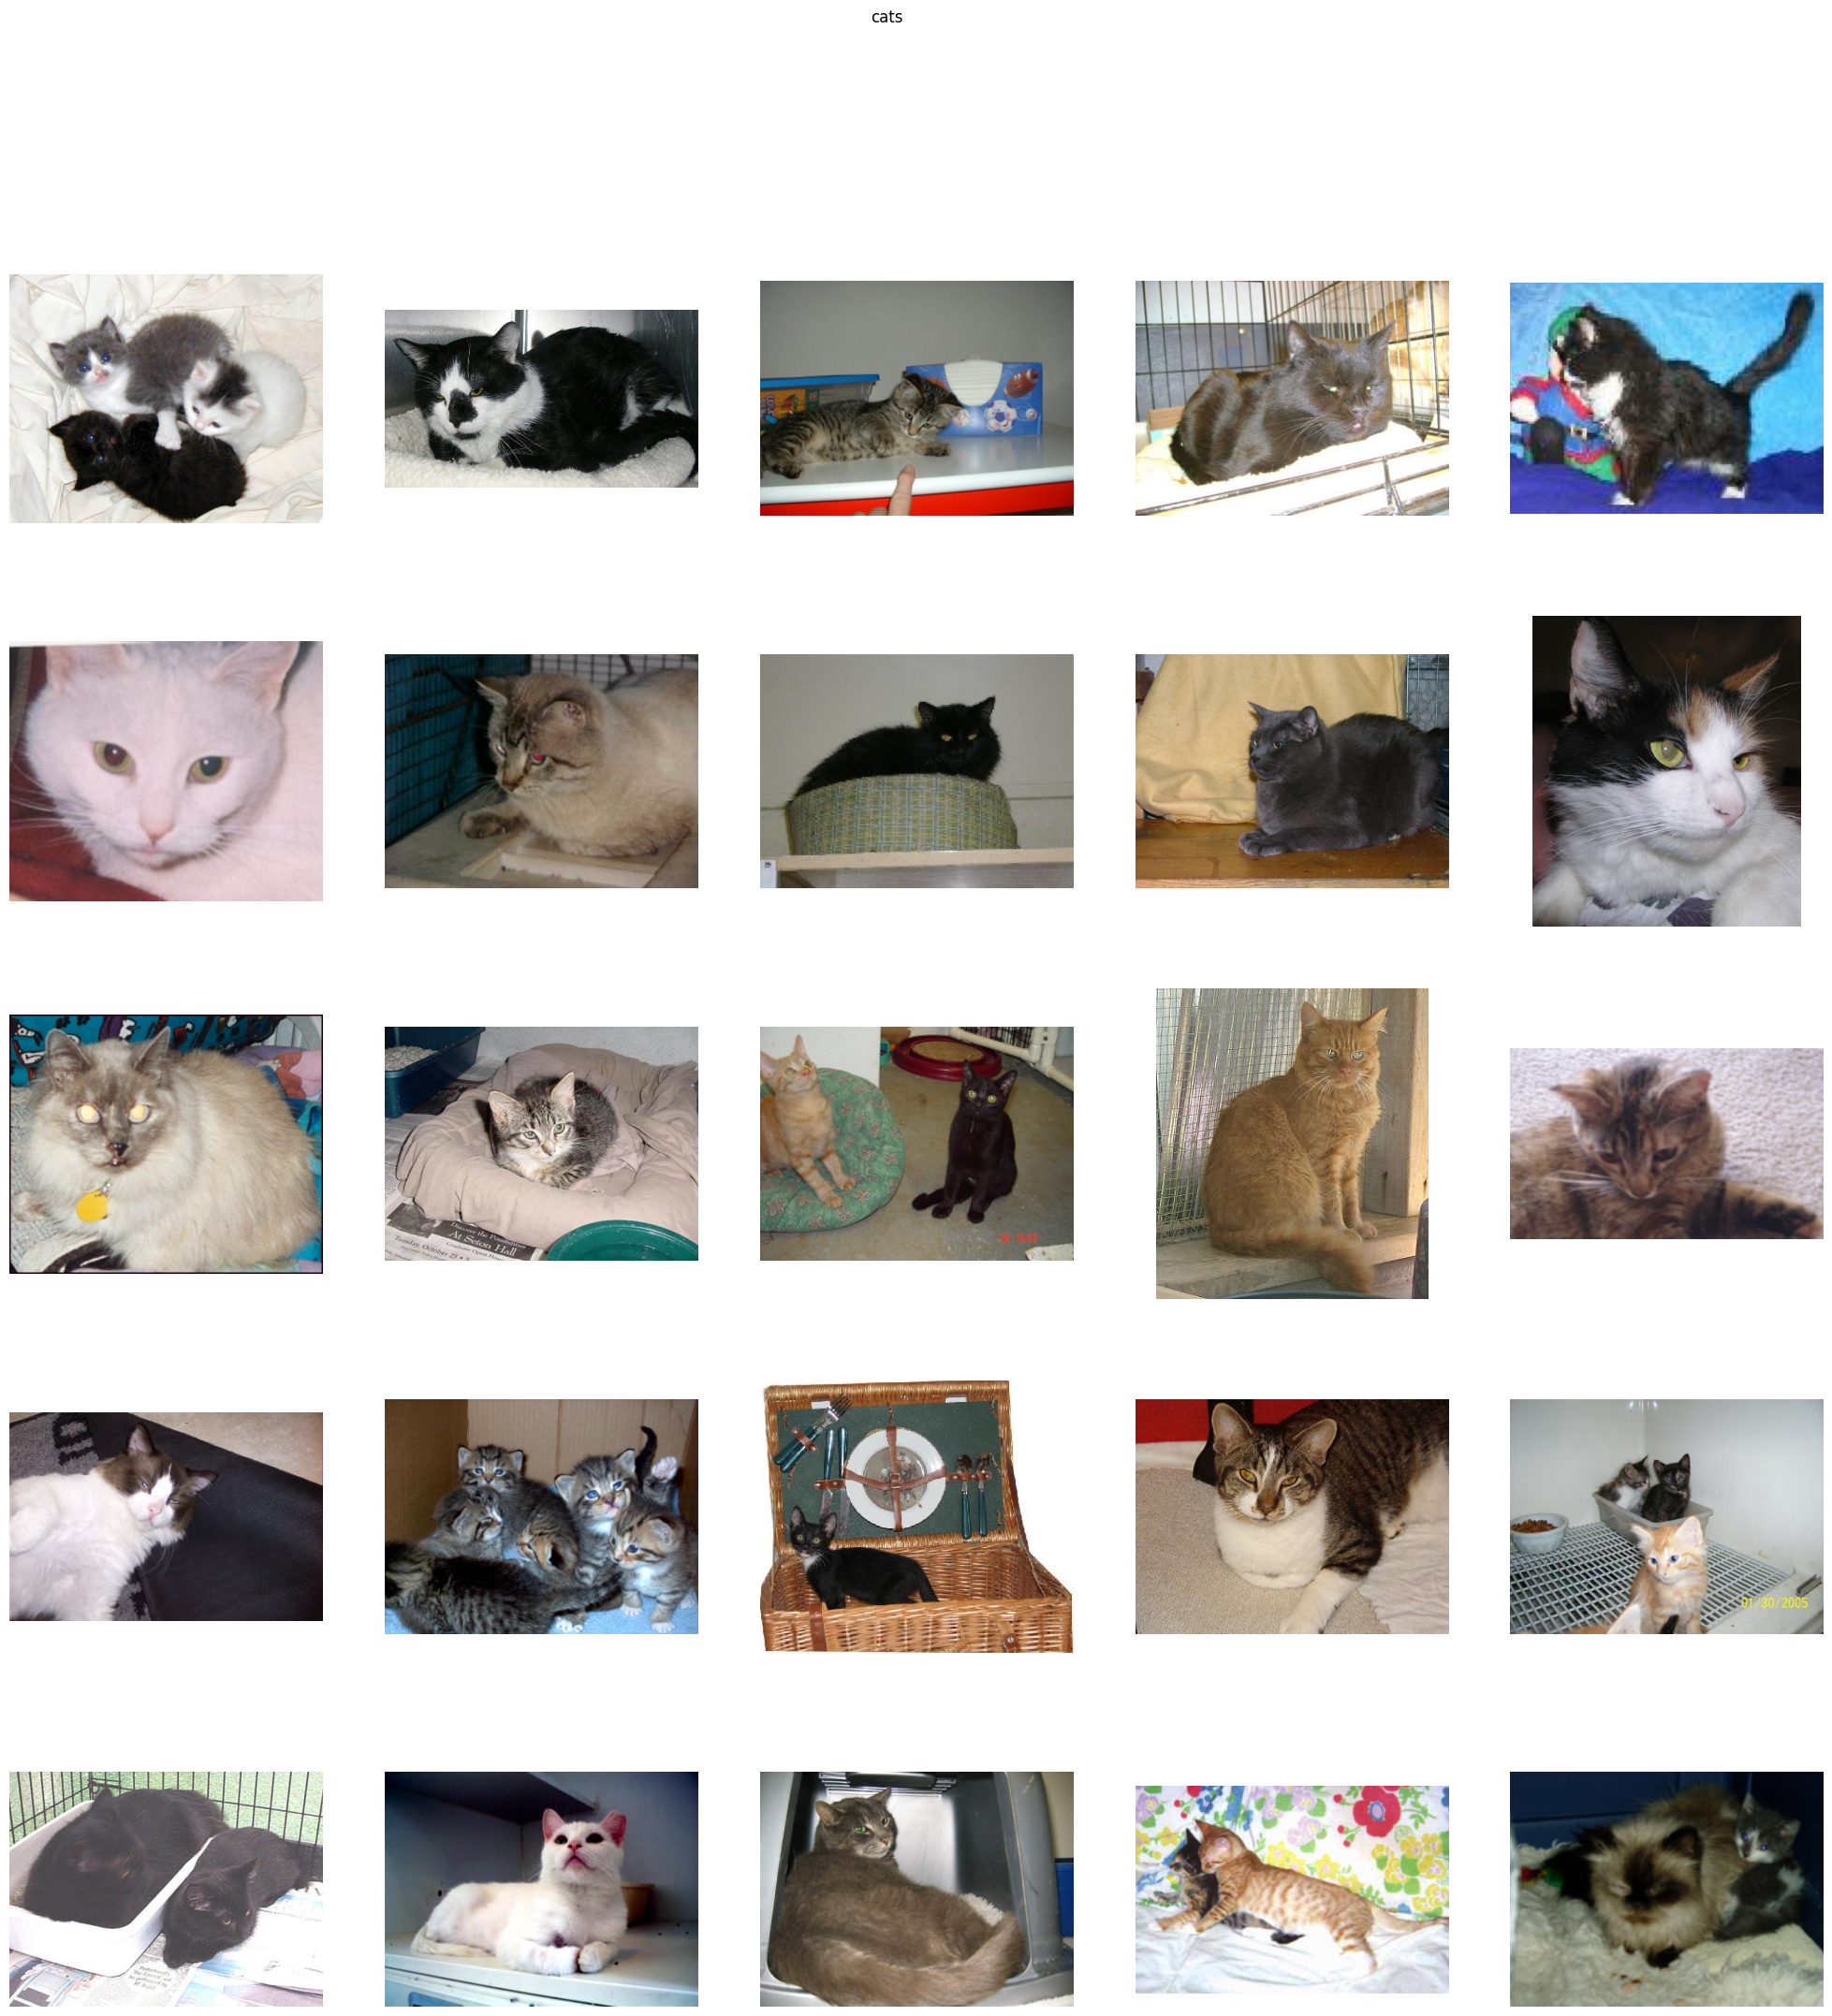

In [113]:
plt.figure(figsize=(25,25))

temp = df[df['label'] == '0']['images'] # Corrected: Compare with string '0' for cats

# Ensure there are at least 25 images to sample
if len(temp) >= 25:
    start = random.randint(0, len(temp) - 25)
    files = temp[start:start+25]
else:
    # If there are fewer than 25 images, take all available images
    files = temp.sample(frac=1).reset_index(drop=True)
    print(f"Warning: Only {len(files)} cat images available to display.")

for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)

    img = load_img(file)
    img = np.array(img)

    plt.imshow(img)
    plt.axis('off')      # ✅ removes x & y axis
    plt.title("")        # ✅ removes any title

plt.suptitle("cats")         # ✅ removes main title if any
plt.show()

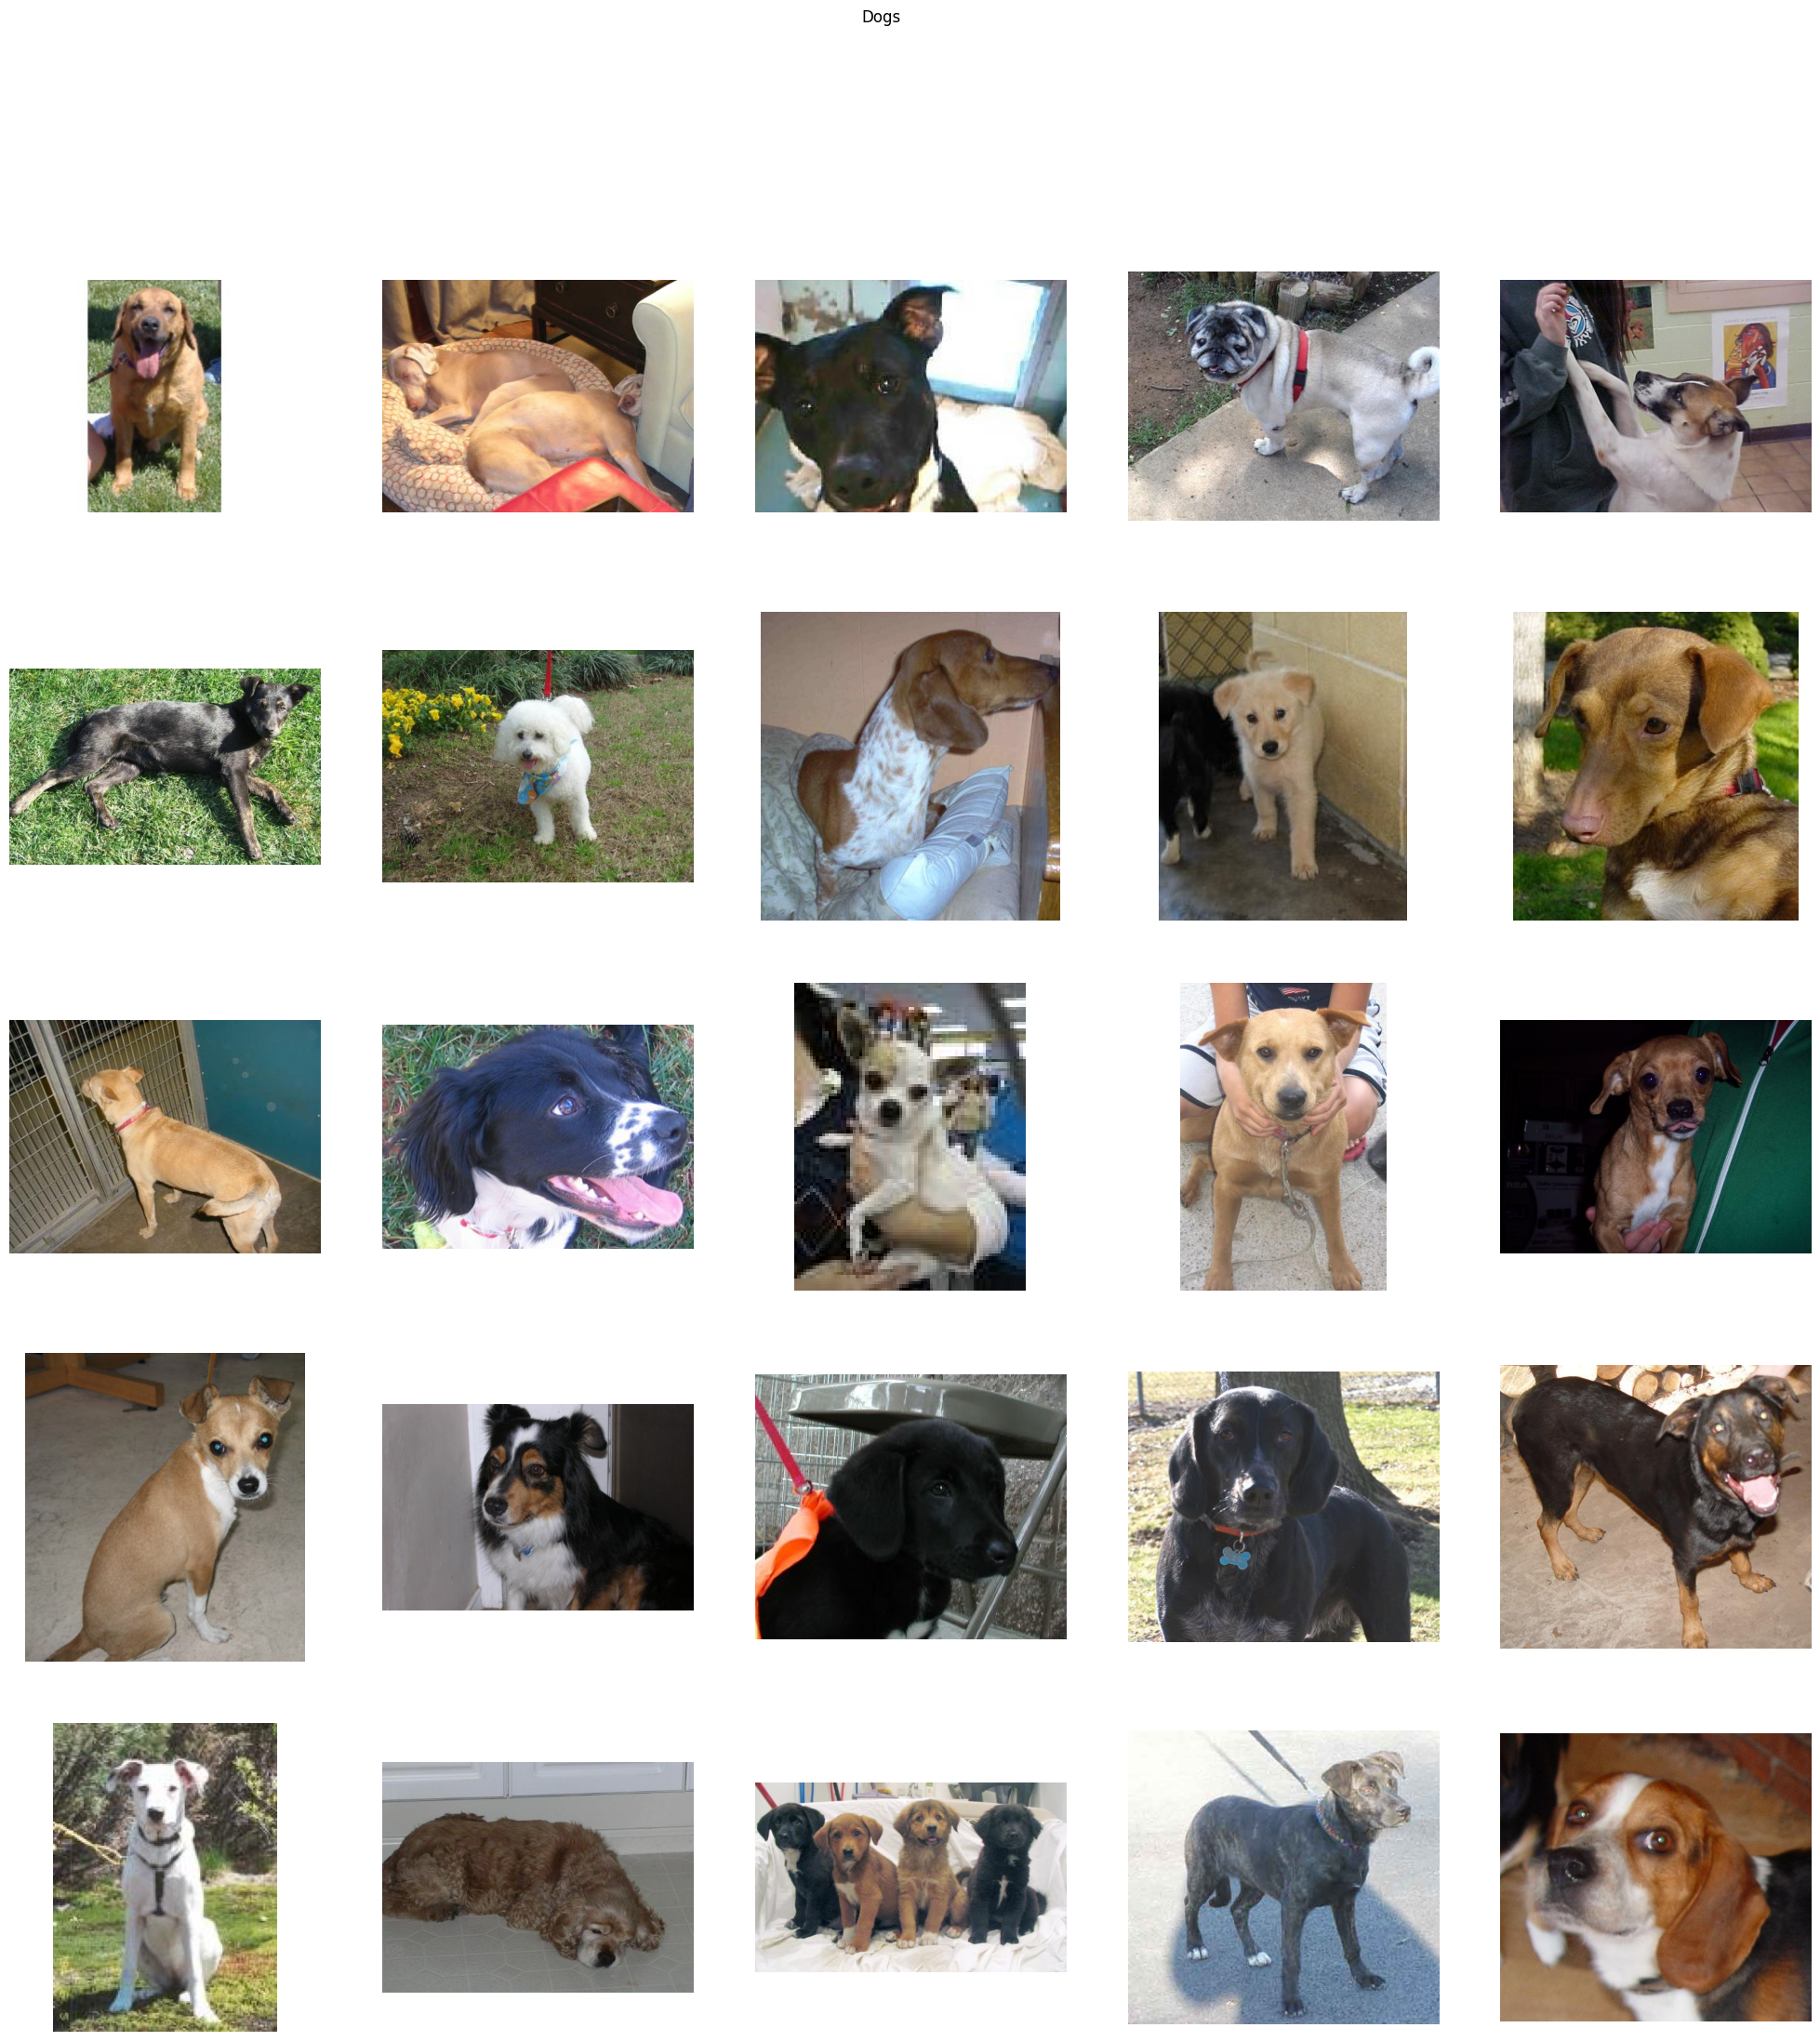

In [114]:
plt.figure(figsize=(25,25))

temp = df[df['label'] == '1']['images'] # Corrected: Compare with string '1' for dogs

# Ensure there are at least 25 images to sample
if len(temp) >= 25:
    start = random.randint(0, len(temp) - 25)
    files = temp[start:start+25]
else:
    # If there are fewer than 25 images, take all available images
    files = temp.sample(frac=1).reset_index(drop=True)
    print(f"Warning: Only {len(files)} dog images available to display.")

for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)

    img = load_img(file)
    img = np.array(img)

    plt.imshow(img)
    plt.axis('off')      # ✅ removes x & y axis
    plt.title("")        # ✅ removes any title

plt.suptitle("Dogs")         # ✅ removes main title if any
plt.show()

<Axes: xlabel='count', ylabel='label'>

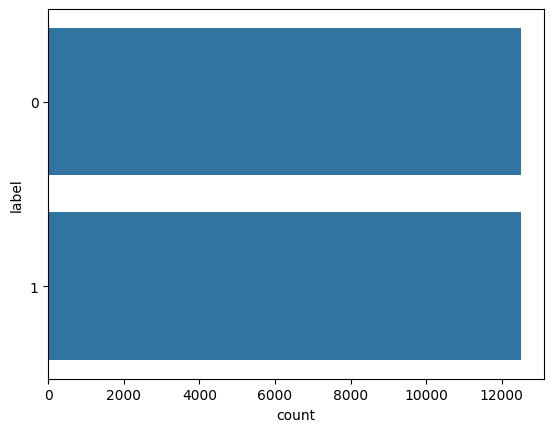

In [115]:
import seaborn as sns
sns.countplot(df['label'])

In [116]:
df.head()

images label
0   PetImages/Cat/2546.jpg     0
1   PetImages/Dog/4245.jpg     1
2   PetImages/Cat/1217.jpg     0
3   PetImages/Dog/9088.jpg     1
4  PetImages/Dog/11703.jpg     1

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
val_generator=ImageDataGenerator(
    rescale=1./255,
)
train_iterator = train_generator.flow_from_dataframe(
    dataframe=df,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_iterator = train_generator.flow_from_dataframe(
    dataframe=df,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 19999 validated image filenames belonging to 2 classes.
Found 4999 validated image filenames belonging to 2 classes.


In [118]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=42)

In [119]:
test.head()

images label
6868   PetImages/Dog/10480.jpg     1
22913    PetImages/Dog/156.jpg     1
9668    PetImages/Dog/8177.jpg     1
13640   PetImages/Cat/7309.jpg     0
23341   PetImages/Dog/5740.jpg     1

In [120]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid'),

])

In [121]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    14,746,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,751,713 (56.27 MB)

 Trainable params: 14,751,713 (56.27 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
history=model.fit(train_iterator,epochs=1, validation_data=val_iterator)

625/625 ━━━━━━━━━━━━━━━━━━━━ 612s 978ms/step - accuracy: 0.8010 - loss: 0.4292 - val_accuracy: 0.7926 - val_loss: 0.4400


In [131]:
history=model.fit(train_iterator,epochs=3, validation_data=val_iterator)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 572s 915ms/step - accuracy: 0.8032 - loss: 0.4212 - val_accuracy: 0.7984 - val_loss: 0.4324
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 620s 913ms/step - accuracy: 0.8115 - loss: 0.4040 - val_accuracy: 0.7990 - val_loss: 0.4448
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 603s 965ms/step - accuracy: 0.8161 - loss: 0.3999 - val_accuracy: 0.8144 - val_loss: 0.4183


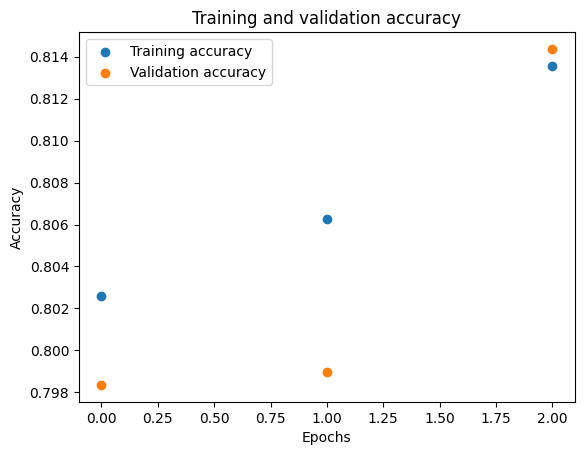

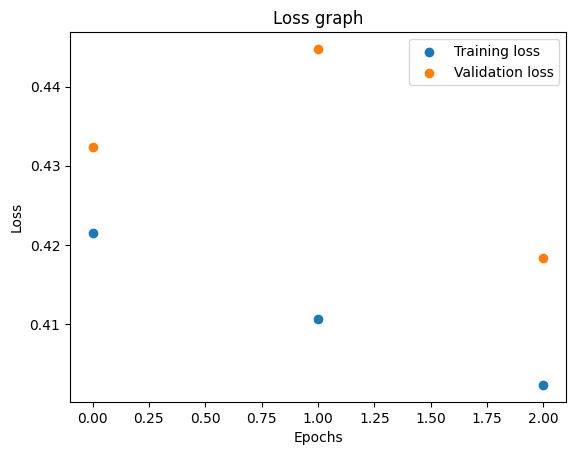

In [132]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.figure() # Create a new figure for accuracy
plt.scatter(epochs,acc,label='Training accuracy') # Changed to scatter plot
plt.scatter(epochs,val_acc,label='Validation accuracy') # Changed to scatter plot
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() # Display the accuracy figure

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure() # Create a new figure for loss
plt.scatter(epochs,loss,label='Training loss') # Changed to scatter plot
plt.scatter(epochs,val_loss,label='Validation loss') # Changed to scatter plot
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() # Display the loss figure